### Step 1: Setup - Importing Libraries and Loading Data

In [590]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set plot style
sns.set_style('whitegrid')

In [591]:
# Load the dataset from the user-provided file
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"
df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/Mall_Customers.csv')

print("Dataset loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

fatal: destination path '21-Days-21-Projects-Dataset' already exists and is not an empty directory.
Dataset loaded successfully.
Data shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Step 2: In-Depth Exploratory Data Analysis (EDA)
Before clustering, we must understand the features and their relationships to find the most promising dimensions for segmentation.

In [592]:
# Basic info and statistics
print("Dataset Info:")
df.info()

# Drop the CustomerID as it's just an identifier and not useful for clustering
df.drop('CustomerID', axis=1, inplace=True)

print("\nDescriptive Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Descriptive Statistics:
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     4

#### 2.1 Univariate Analysis (Feature Distributions)

Text(0.5, 1.0, 'Spending by Gender')

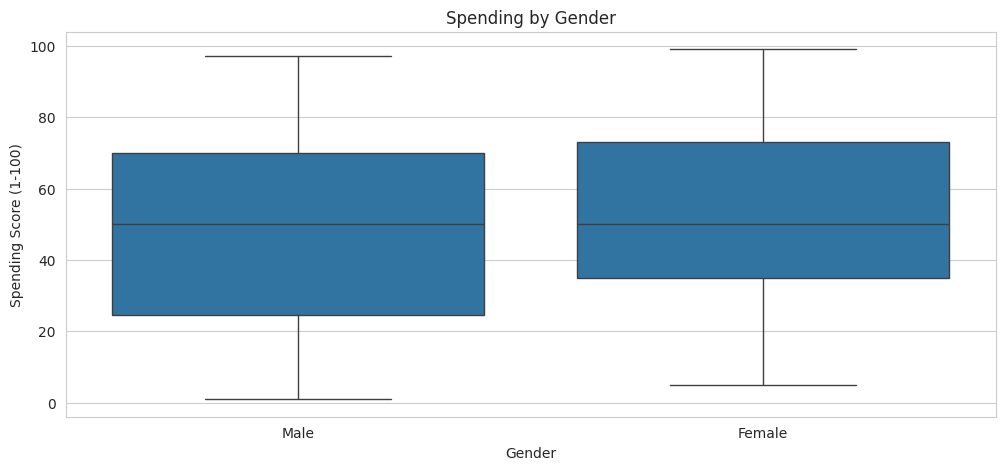

In [593]:
fig, axes = plt.subplots(1, 1, figsize=(12, 5))  # 1 row, 2 columns

sns.boxplot(
    data=df,
    x='Gender',
    y='Spending Score (1-100)'
).set_title('Spending by Gender')


#### 2.2 Bivariate Analysis (Looking for Relationships)

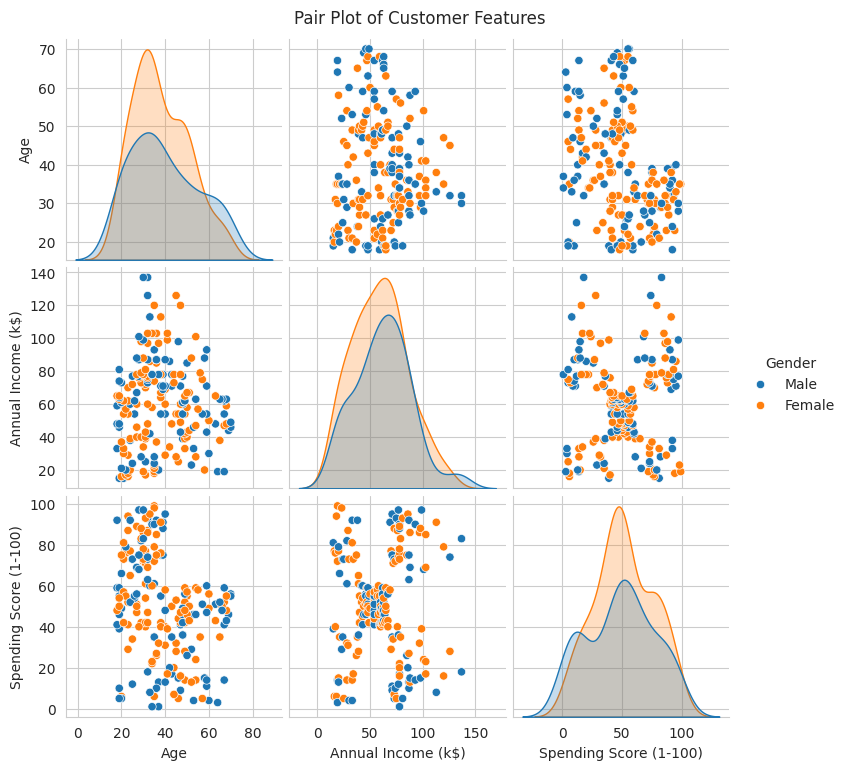

In [594]:
# Using pairplot to visualize relationships between all numerical variables
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender', diag_kind='kde')
plt.suptitle('Pair Plot of Customer Features', y=1.02)
plt.show()

### Submission Criteria

Based on the project objectives and the insights gained from the initial analysis, here are the key criteria for your submission:

1.  **Explore Gender vs. Spending Score:** Analyze the relationship between 'Gender' and 'Spending Score (1-100)' to see if gender plays a significant role in spending habits. Visualizations and summary statistics would be helpful here.
2.  **Apply Feature Engineering for Clustering:** Create a new feature using existing data (Feature Engineering). Then, explore if clustering can be effectively performed using this newly engineered feature in combination with one or more existing features. Document the feature engineering process, the chosen features for clustering, the determination of the optimal number of clusters (e.g., using the Elbow Method), and the resulting cluster visualization and interpretation.

In [595]:
# Summary stats by Gender
summary_stats = df.groupby('Gender')['Spending Score (1-100)'].describe()
print(summary_stats)


        count       mean       std  min   25%   50%   75%   max
Gender                                                         
Female  112.0  51.526786  24.11495  5.0  35.0  50.0  73.0  99.0
Male     88.0  48.511364  27.89677  1.0  24.5  50.0  70.0  97.0


In [596]:
df.groupby('Gender')['Spending Score (1-100)'].mean()


,Spending Score (1-100)
Gender,
Female,51.526786
Male,48.511364


/tmp/ipython-input-1227025327.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




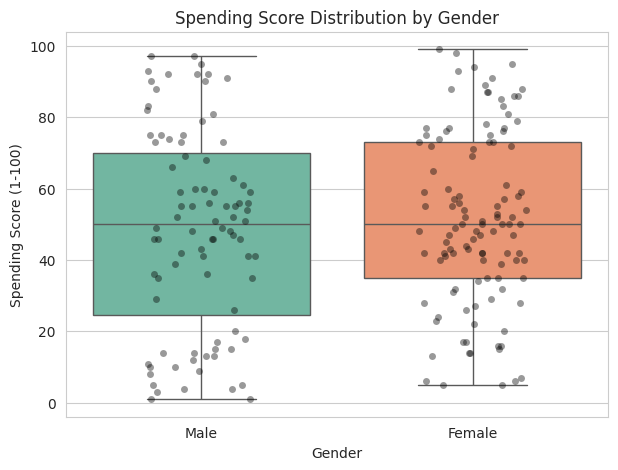

In [597]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='Set2')
sns.stripplot(x='Gender', y='Spending Score (1-100)', data=df,
              color='black', alpha=0.4, jitter=0.2)
plt.title('Spending Score Distribution by Gender')
plt.show()


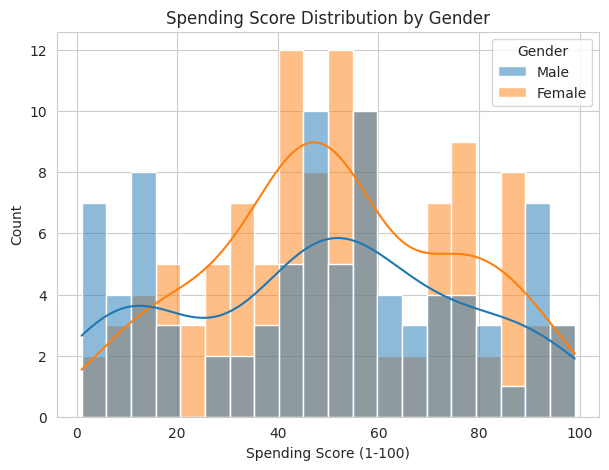

In [598]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='Spending Score (1-100)', hue='Gender', kde=True, bins=20, alpha=0.5)
plt.title('Spending Score Distribution by Gender')
plt.show()


In [599]:
from scipy import stats

male_scores = df.loc[df['Gender']=='Male', 'Spending Score (1-100)']
female_scores = df.loc[df['Gender']=='Female', 'Spending Score (1-100)']

tstat, pval = stats.ttest_ind(male_scores, female_scores, equal_var=False)
print(f"T-test: t={tstat:.3f}, p={pval:.4f}")


T-test: t=-0.805, p=0.4220


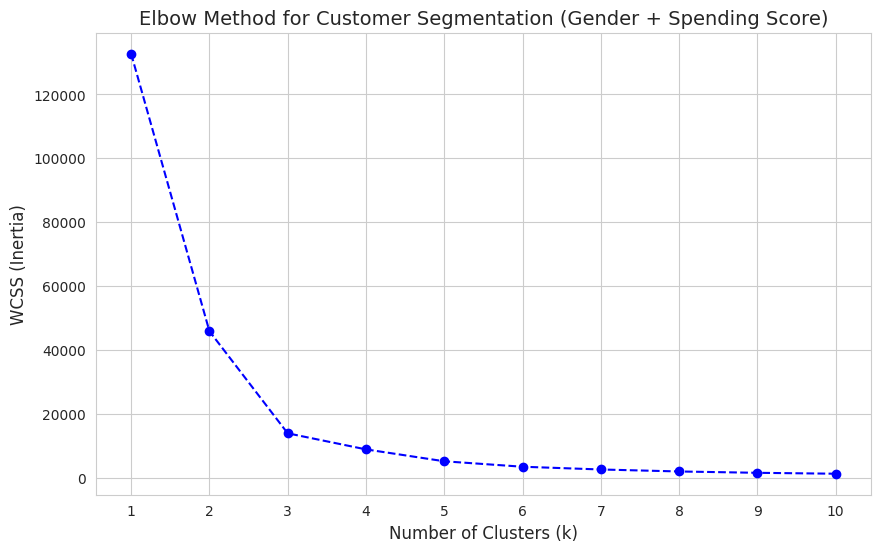

In [600]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Encode Gender into numeric
encoder = LabelEncoder()
df['Gender_encoded'] = encoder.fit_transform(df['Gender'])  # Male=0, Female=1

# Features for clustering
X = df[['Gender_encoded', 'Spending Score (1-100)']]

# Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method for Customer Segmentation (Gender + Spending Score)', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Inertia)', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


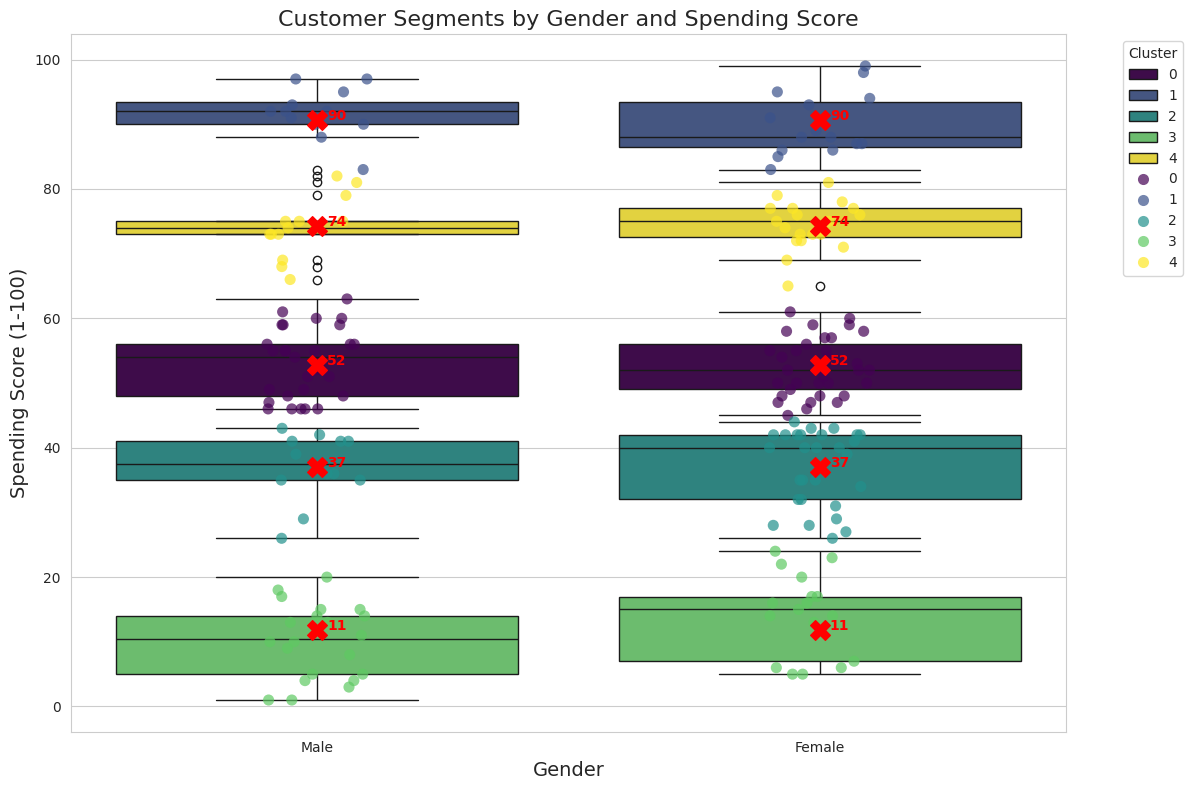

In [601]:
# Final KMeans model
k = 5  # choose from elbow
kmeans_final = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(X)

# Map Gender to categorical for consistent x-axis
df['Gender'] = df['Gender_encoded'].map({0: 'Male', 1: 'Female'})

# Calculate centroids per cluster (ignore gender)
centroids = df.groupby('Cluster')[['Spending Score (1-100)']].mean().reset_index()

plt.figure(figsize=(12, 8))

# Boxplot (without hue)
sns.boxplot(
    data=df,
    x='Gender',
    y='Spending Score (1-100)',
    color='lightgray',
    palette='viridis',
    hue='Cluster',
    dodge=False

)

# Overlay stripplot with clusters
sns.stripplot(
    data=df,
    x='Gender',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis',
    dodge=False,  # all points aligned vertically
    size=8,
    alpha=0.7
)

# Map gender positions for plotting centroids
gender_positions = {'Male': 0, 'Female': 1}

# Plot centroids on both Male and Female lines
for _, row in centroids.iterrows():
    for gender, xpos in gender_positions.items():
        plt.scatter(
            xpos,
            row['Spending Score (1-100)'],
            color='red',
            s=200,
            marker='X',
            zorder=10
        )
        plt.text(
            xpos + 0.02,
            row['Spending Score (1-100)'],
            f"{int(row['Spending Score (1-100)'])}",
            color='red',
            weight='bold'
        )

plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Customer Segments by Gender and Spending Score', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




**Gender-Based Spending Personas and Strategy:**

1. **High Spenders (Cluster 1):**

   * Includes both males and females, but slightly more females in the upper range.
   * Spending scores are very high (\~85–99).
   * Ideal for premium, exclusive, or loyalty-based offers targeting high-value customers.

2. **Moderate Spenders (Cluster 0):**

   * Distributed across both genders.
   * Spending scores around 50–55.
   * Core segment suitable for regular promotions, cross-selling, and retention campaigns.

3. **Low Spenders (Cluster 2 & 3):**

   * Cluster 2: Mixed gender, spending \~35–40.
   * Cluster 3: Mostly females, spending \~10–15.
   * Best approached with discounts, awareness campaigns, and engagement incentives.

4. **Moderate-High Spenders (Cluster 4):**

   * Mixed gender segment, spending \~70–75.
   * Likely trend-sensitive or occasional big spenders.
   * Suitable for seasonal promotions, bundle deals, and upselling campaigns.

**Key Insights:**

* Females tend to dominate the high spending brackets, whereas males are more prevalent in lower to moderate spending clusters.
* Segmentation allows marketing strategies to be personalized by gender and spending behavior.
* Targeted campaigns improve engagement, conversion, and customer loyalty compared to generic promotions.


In [602]:
df.drop(['Cluster', 'Gender_encoded'], axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Female,19,15,39
1,Female,21,15,81
2,Male,20,16,6
3,Male,23,16,77
4,Male,31,17,40


                          Gender       Age  Annual Income (k$)  \
Gender                  1.000000 -0.060867           -0.056410   
Age                    -0.060867  1.000000           -0.012398   
Annual Income (k$)     -0.056410 -0.012398            1.000000   
Spending Score (1-100)  0.058109 -0.327227            0.009903   

                        Spending Score (1-100)  
Gender                                0.058109  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


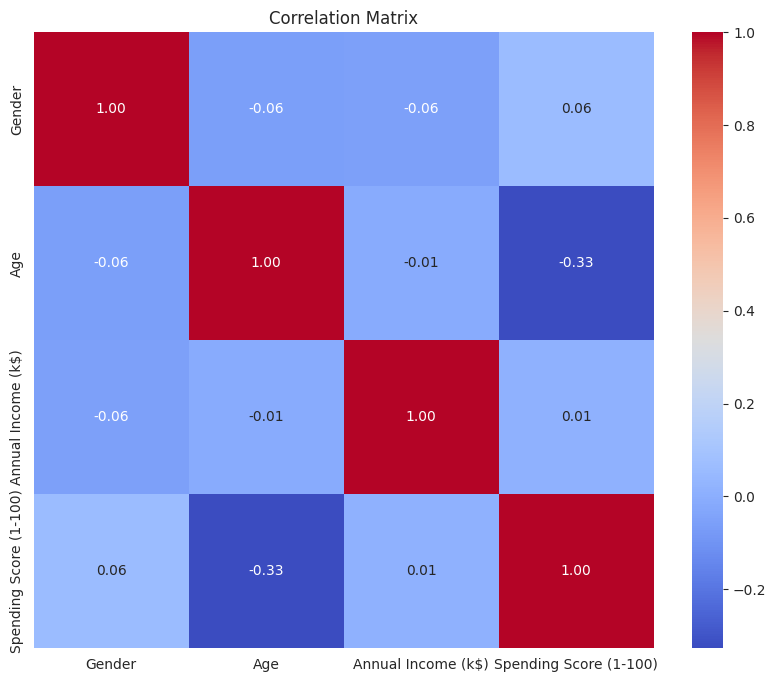

In [603]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])  # Male=0, Female=1
corr_matrix = df.corr()

# Display correlation matrix
print(corr_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [604]:
from scipy.stats import pearsonr

# Assuming Gender is encoded as 0=Male, 1=Female
corr, pval = pearsonr(df['Gender'], df['Annual Income (k$)'])
print(f"Pearson correlation: r={corr:.3f}, p={pval:.4f}")


Pearson correlation: r=-0.056, p=0.4276


We know
#### 3.2 Income-Based Personas and Strategy
Using the quantitative profiles, we can define our segments:
- **Cluster 0 (Careful High-Earners):** High income (~88k) but low spending (~17). Cautious, value-driven buyers.
- **Cluster 1 (Standard):** Average income (~55k) and spending (~50). This is the largest, core customer group.
- **Cluster 2 (Budget Shoppers):** Low income (~26k) and low spending (~21). Highly price-sensitive.
- **Cluster 3 (Target - High Value):** High income (~87k) and high spending (~82). The mall's prime target.
- **Cluster 4 (Enthusiasts):** Low income (~26k) but high spending (~79). Likely young, trend-focused shoppers.


and

#### 4.1 Interpreting the Age-Based Segments
This model gives us a different perspective:
- **Young High-Spenders:** A clear group of customers under 40 with high spending scores.
- **Young Low-Spenders:** Customers under 40 with low-to-moderate spending.
- **Older Average-Spenders:** Customers over 40 with moderate spending scores.
- **Older Low-Spenders:** A small group of older customers with very low spending scores.

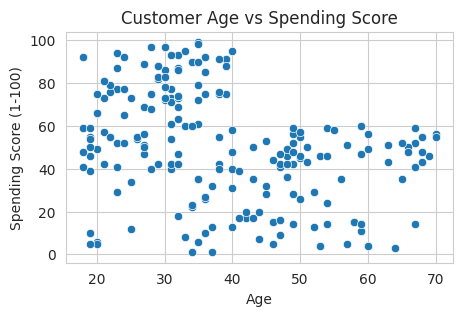

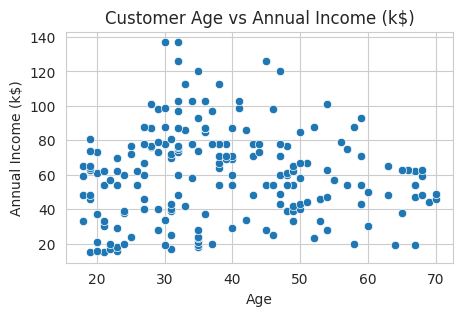

In [605]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,3))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.title("Customer Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

plt.figure(figsize=(5,3))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df)
plt.title("Customer Age vs Annual Income (k$)")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

In [606]:
import pandas as pd

# Compute mean age
mean_age = df['Age'].mean()

# Create Spending Potential
df['Spending_Potential'] = df['Annual Income (k$)'] / (abs(df['Age']) + 1)

# Optional: normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Spending_Potential_norm'] = scaler.fit_transform(df[['Spending_Potential']])

# Inspect
df[['Age', 'Annual Income (k$)', 'Spending_Potential', 'Spending_Potential_norm']].head()


,Age,Annual Income (k$),Spending_Potential,Spending_Potential_norm
0,19,15,0.750000,0.113670
1,21,15,0.681818,0.097201
2,20,16,0.761905,0.116546
3,23,16,0.666667,0.093541
4,31,17,0.531250,0.060831


In [607]:
# Use Spending_Potential_norm + Spending Score for clustering
X = df[['Spending_Potential_norm', 'Spending Score (1-100)']]


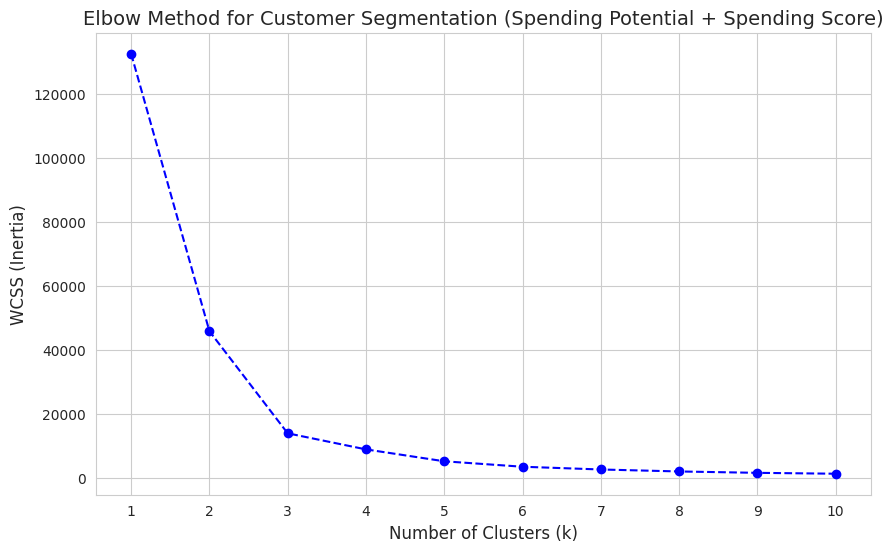

In [608]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method for Customer Segmentation (Spending Potential + Spending Score)', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Inertia)', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [609]:
# Example: split Spending Potential by above/below median
median_potential = df['Spending_Potential'].median()
low_potential = df[df['Spending_Potential'] <= median_potential]['Spending Score (1-100)']
high_potential = df[df['Spending_Potential'] > median_potential]['Spending Score (1-100)']

tstat, pval = stats.ttest_ind(low_potential, high_potential, equal_var=False)
print(f"T-test: t={tstat:.3f}, p={pval:.4f}")


T-test: t=-1.739, p=0.0836


In [610]:
k = 4  # choose based on elbow
kmeans_final = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(X)


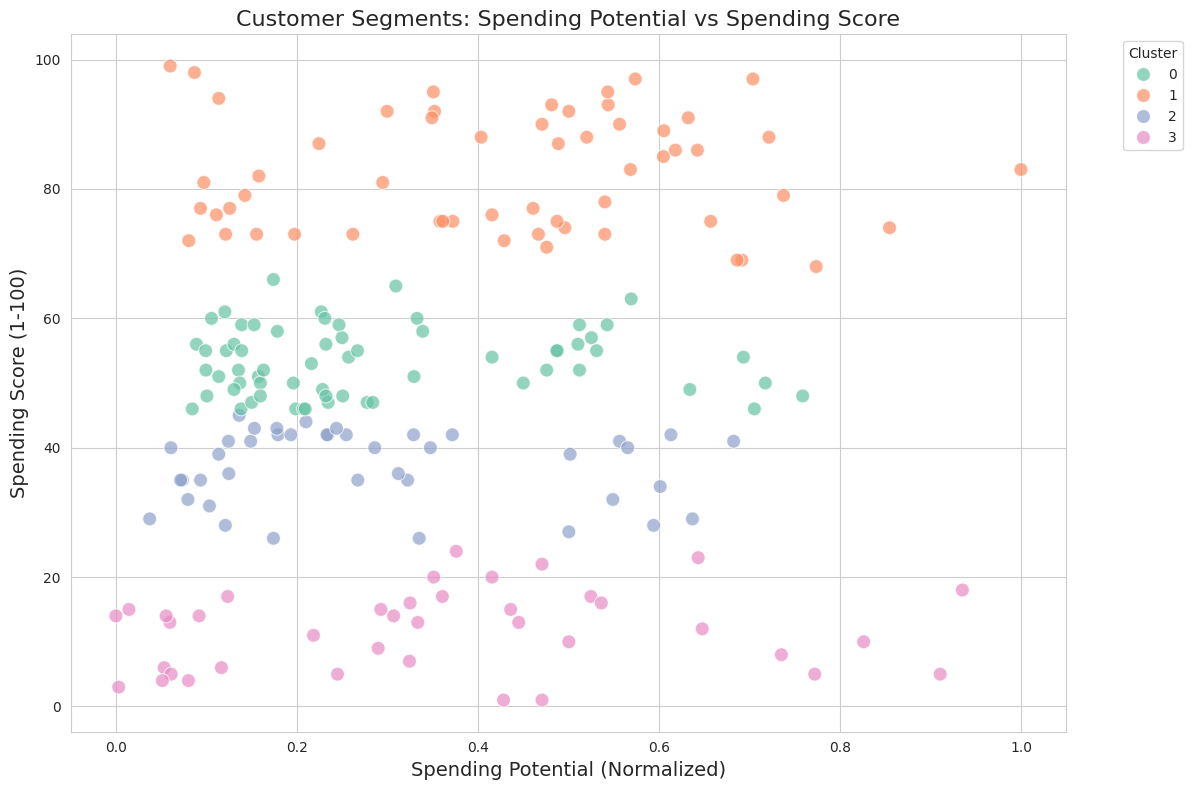

In [611]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Spending_Potential_norm',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set2',
    s=100,
    alpha=0.7
)

plt.title('Customer Segments: Spending Potential vs Spending Score', fontsize=16)
plt.xlabel('Spending Potential (Normalized)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2721778538.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




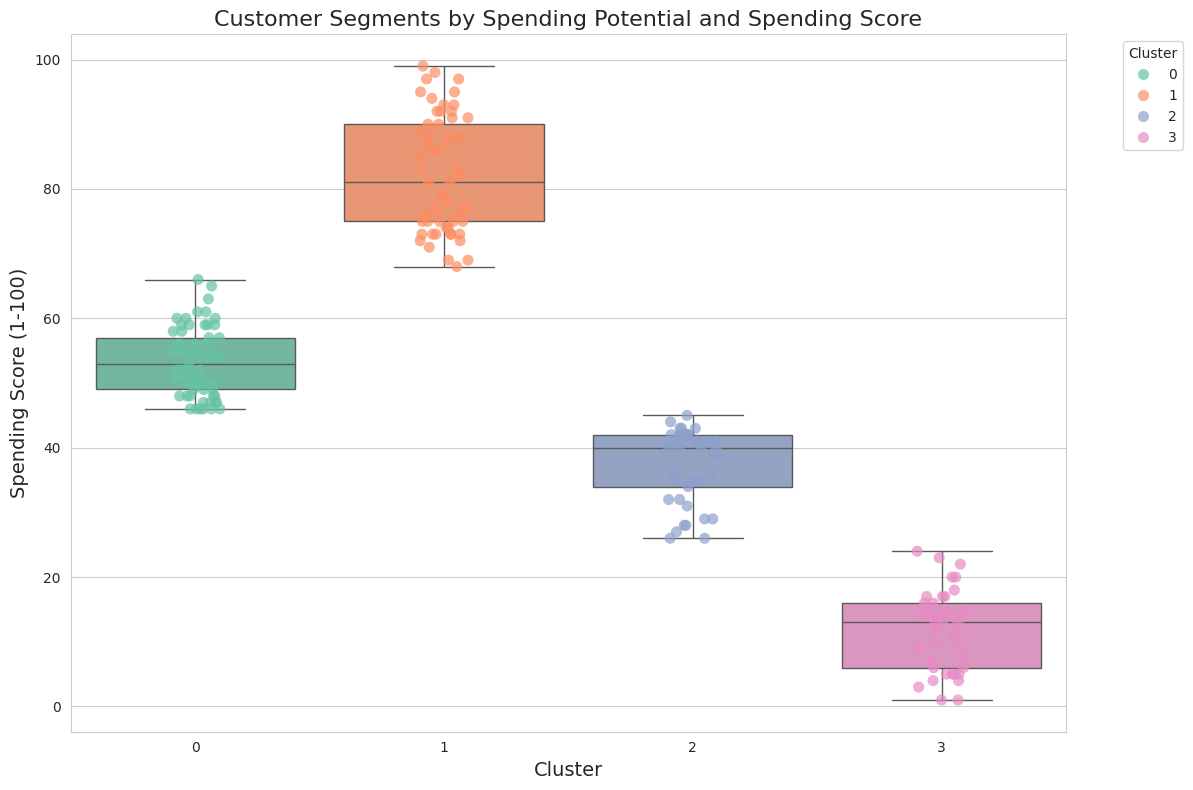

In [612]:
plt.figure(figsize=(12, 8))

# Boxplot by cluster (without x-axis categorical, using cluster as hue)
sns.boxplot(
    x='Cluster',
    y='Spending Score (1-100)',
    data=df,
    palette='Set2'
)

# Overlay scatter for Spending Potential
sns.stripplot(
    x='Cluster',
    y='Spending Score (1-100)',
    data=df,
    hue='Cluster',
    palette='Set2',
    dodge=False,
    alpha=0.7,
    size=8
)

plt.title('Customer Segments by Spending Potential and Spending Score', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [613]:
df[['Spending_Potential', 'Spending Score (1-100)']].corr()


,Spending_Potential,Spending Score (1-100)
Spending_Potential,1.000000,0.151857
Spending Score (1-100),0.151857,1.000000


Based on the scatter plot and box plots, the customer segments can be analyzed as follows:

### Analysis of Customer Segments
* **Cluster 0 (Green):** These customers have a **moderate spending score** (around 50) and a **low to moderate spending potential**. They represent a segment that is a reliable, steady source of business but not high-spenders.

---

* **Cluster 1 (Orange):** This group has a **high spending score** (70-90) and a **moderate to high spending potential**. This is arguably the most valuable customer segment, as they have both the means and the willingness to spend. They are likely a prime target for loyalty programs and high-value product promotions.

---

* **Cluster 2 (Blue):** This segment is characterized by a **moderate spending potential** but a **low to moderate spending score** (30-50). They have the capacity to spend more but are not currently doing so. Marketing efforts for this group should focus on converting their potential into actual spending, perhaps through targeted offers and incentives.

---

* **Cluster 3 (Pink):** These customers have a **very low spending score** (under 20) and a **low spending potential**. They are likely a less profitable segment. Marketing efforts could focus on retention and minimal engagement, or on low-cost products, rather than high-value promotions.